# General testing notebook

Not to be pushed

### Load data

In [2]:
import pandas as pd

# Just pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/Users/ms731/opt/anaconda3/envs/tensorflow-py3.7.9/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


In [3]:
# These variables are only used for loading the desired file here
keywords_en = 'mcdonalds russia' 
keywords_ru = 'макдональдс россия'
keywords_uk = 'макдональдс росія'
num_tweets = 5000
start_date = '2022-02-24'
end_date = '2022-03-17'

tweets_en_df = pd.read_csv('data/tweets_clean_en_df_' + keywords_en.replace(' ', '_') + str(num_tweets) + 'dailytweets_' + start_date + '_to_' + end_date + '.csv')
tweets_ru_df = pd.read_csv('data/tweets_raw_ru_df_' + keywords_ru.replace(' ', '_') + str(num_tweets) + 'dailytweets_' + start_date + '_to_' + end_date + '.csv')
tweets_uk_df = pd.read_csv('data/tweets_raw_uk_df_' + keywords_uk.replace(' ', '_') + str(num_tweets) + 'dailytweets_' + start_date + '_to_' + end_date + '.csv')

In [9]:
import json
import botometer

# Load my API keys
with open("../twitter_keys_config.json") as twitter_cfg_file:
    twitter_config = json.load(twitter_cfg_file)

with open("../rapidapi_keys_config.json") as rapidapi_cfg_file:
    rapidapi_config = json.load(rapidapi_cfg_file)

consumer_key = twitter_config["API_key"]
consumer_secret = twitter_config["API_secret"]
access_token = twitter_config["access_token"]
access_token_secret = twitter_config["access_secret"]

rapidapi_key = rapidapi_config["API_key"]


twitter_app_auth = {
                    'consumer_key': consumer_key,
                    'consumer_secret': consumer_secret,
                    'access_token': access_token,
                    'access_token_secret': access_token_secret
                   }
botometer_api_url = "https://botometer-pro.p.rapidapi.com"

bom = botometer.Botometer(
                wait_on_ratelimit = True,
                botometer_api_url=botometer_api_url,
                rapidapi_key = rapidapi_key,
                **twitter_app_auth)

In [10]:
# Check a single account by screen name
result = bom.check_account('@Peyton1525')
result

{'cap': {'english': 0.36264564124632276, 'universal': 0.28846389695411967},
 'display_scores': {'english': {'astroturf': 0.2,
   'fake_follower': 0.0,
   'financial': 0.2,
   'other': 0.4,
   'overall': 0.3,
   'self_declared': 0.0,
   'spammer': 0.0},
  'universal': {'astroturf': 0.2,
   'fake_follower': 0.0,
   'financial': 0.0,
   'other': 0.4,
   'overall': 0.2,
   'self_declared': 0.0,
   'spammer': 0.0}},
 'raw_scores': {'english': {'astroturf': 0.03,
   'fake_follower': 0.0,
   'financial': 0.03,
   'other': 0.08,
   'overall': 0.06,
   'self_declared': 0.01,
   'spammer': 0.01},
  'universal': {'astroturf': 0.03,
   'fake_follower': 0.01,
   'financial': 0.01,
   'other': 0.09,
   'overall': 0.03,
   'self_declared': 0.01,
   'spammer': 0.0}},
 'user': {'majority_lang': 'en',
  'user_data': {'id_str': '472463947', 'screen_name': 'Peyton1525'}}}

In [30]:
result["cap"]["english"]

0.2787259978325127

In [24]:
accounts = tweets_en_df[80:100]["Username"].to_numpy()

for idx,account in enumerate(accounts):
    accounts[idx] = "@" + account

print(accounts)

['@CSI300_X' '@VJannerberg' '@mantequillaPtod' '@mark_woodroffe'
 '@LegaliseF' '@Nat10281' '@jfax14' '@xAthaz' '@no_username_yet'
 '@Hrdevonsal2' '@Mladen09016000' '@KatarzynaMari11' '@laudrupromario'
 '@mwolfgr' '@PiechowiakMicha' '@StrawberrPicker' '@Pawelwodnicki'
 '@KMetaKowalski' '@Vili__L' '@clauci2nd']


In [31]:
# Check a sequence of accounts
#accounts = ['@clayadavis', '@onurvarol', '@jabawack']
accounts_scores = []
for screen_name, result in bom.check_accounts_in(accounts):
    accounts_scores.append(result)

In [36]:
for account, account_score in zip(accounts, accounts_scores):
    print(account, account_score["cap"]["english"])

@CSI300_X 0.7852210697594887
@VJannerberg 0.7874002196908744
@mantequillaPtod 0.22631829961109876
@mark_woodroffe 0.7470839770895665
@LegaliseF 0.7611878625273879
@Nat10281 0.793087009461318
@jfax14 0.812935016236137
@xAthaz 0.5778862084370772
@no_username_yet 0.7759887465100499
@Hrdevonsal2 0.7920317685697057
@Mladen09016000 0.7826357858330618
@KatarzynaMari11 0.7053377817049258
@laudrupromario 0.36264564124632276
@mwolfgr 0.2520419704315795
@PiechowiakMicha 0.7668769621923945
@StrawberrPicker 0.2787259978325127
@Pawelwodnicki 0.7611878625273879
@KMetaKowalski 0.7611878625273879
@Vili__L 0.6763619064808265
@clauci2nd 0.7717813288270262


In [38]:
tweets_en_df.head(1000)

,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Num Followers,Num Friends,Text_lemmatized
0,0,0,2022-02-24 23:50:15+00:00,1496995923376762929,"There are over 850 McDonalds locations in Russia, and Russia is getting sanctioned. How does McDonalds - an American company - legally opportune in a country under these sanctions? Sounds like they just lost @McDonaldsCorp https://t.co/A5WwPfh3Gc",honestduane,1,(((Duane))) - 🧙‍♂️🖖🦁,602.0,974.0,"['there', '850', 'mcdonalds', 'location', 'russia', 'russia', 'getting', 'sanctioned', 'how', 'mcdonalds', 'american', 'company', 'legally', 'opportune', 'country', 'sanction', 'sound', 'like', 'lost', 'mcdonaldscorp', 'httpstcoa5wwpfh3gc']"
1,1,1,2022-02-24 23:10:35+00:00,1496985942456139777,#StandWithUkraine sanctions of Russia that do not cut off the sale of gas and oil are the same as ending the sale of salads at #McDonalds's. This is their economy and they can be put to their knee.,PZacsek,0,ambiguousBIG,16.0,68.0,"['standwithukraine', 'sanction', 'russia', 'cut', 'sale', 'gas', 'oil', 'ending', 'sale', 'salad', 'mcdonaldss', 'this', 'economy', 'put', 'knee']"
2,2,2,2022-02-24 23:00:44+00:00,1496983462263328774,"@mrvintageestate For the first time, two countries with McDonalds in them have gone to war.\n\nI can't believe that's a legitimate sentence.\n\n#ukraine #russia #ukrainerussiaconflict https://t.co/IEl0cvkPUw",Wakato_owo,5,"Wakato, Mlarmch!!",128.0,667.0,"['mrvintageestate', 'for', 'first', 'time', 'two', 'country', 'mcdonalds', 'gone', 'war', 'i', 'cant', 'believe', 'thats', 'legitimate', 'sentence', 'ukraine', 'russia', 'ukrainerussiaconflict', 'httpstcoiel0cvkpuw']"
3,3,3,2022-02-24 22:59:41+00:00,1496983198978519050,@Cisco @Apple @Microsoft @MDLZ @PepsiCo @McDonalds @Boeing @fordm @exxonmobil \nGet out of Russia. https://t.co/qyb1hROGWg,KaMac76,0,🌍KaterinaVonTramp😷🌊,1469.0,2792.0,"['cisco', 'apple', 'microsoft', 'mdlz', 'pepsico', 'mcdonalds', 'boeing', 'fordm', 'exxonmobil', 'get', 'russia', 'httpstcoqyb1hrogwg']"
4,4,4,2022-02-24 22:57:27+00:00,1496982636996317184,@lotus12282633 @DonnaJo1002 @fab4screamie @Valkyrry @PattiKimble @ShercoSherrill @network_gal @PRubesa @NoreneD39766667 @perrigoat @Swags_D17 @grupp_arthur @1stCAV_AM_1972 @AndrewTRei1 @JonMesser7 @elisabeth_pal @kim_f86 @Robyn_CherCrew @TheAwkwardLefty @dorismelmore1 @Jeeneree @GlennVotesBlue @mitch_gorman @JameJoh86430339 @TrishBeMe @AveryBa68752542 @unewmeb41 @WebbL03 @MoreWhit @dac37799066 @nadiepetah @rlongman1 @MVRaiderFan @debbie_american @Cherfan4ever1 @Meiguo_nan @gregdemarco1964 @TXhoneydew @RestlessNews @judeaa @markie_kmarky8 @kasseykrammer @SaulTgh @boris3324 @christraynor @Impeach66051636 @yazzyqz @Itridpm @DanerE_57 @jheil American companies need to get out of Russia — McDonalds &amp; Coke &amp; others,agavecorn,3,agave corn 💙#TheCountryIsSickFromLackOfJustice,12547.0,13208.0,"['lotus12282633', 'donnajo1002', 'fab4screamie', 'valkyrry', 'pattikimble', 'shercosherrill', 'network_gal', 'prubesa', 'norened39766667', 'perrigoat', 'swags_d17', 'grupp_arthur', '1stcav_am_1972', 'andrewtrei1', 'jonmesser7', 'elisabeth_pal', 'kim_f86', 'robyn_chercrew', 'theawkwardlefty', 'dorismelmore1', 'jeeneree', 'glennvotesblue', 'mitch_gorman', 'jamejoh86430339', 'trishbeme', 'averyba68752542', 'unewmeb41', 'webbl03', 'morewhit', 'dac37799066', 'nadiepetah', 'rlongman1', 'mvraiderfan', 'debbie_american', 'cherfan4ever1', 'meiguo_nan', 'gregdemarco1964', 'txhoneydew', 'restlessnews', 'judeaa', 'markie_kmarky8', 'kasseykrammer', 'saultgh', 'boris3324', 'christraynor', 'impeach66051636', 'yazzyqz', 'itridpm', 'danere_57', 'jheil', 'american', 'company', 'need', 'get', 'russia', 'mcdonalds', 'amp', 'coke', 'amp', 'others']"
5,5,5,2022-02-24 22:50:09+00:00,1496980798234402820,@FinnLove11 @adinqiang @pragmatictexan @CNN We asked Russia to Join Nato they said no. Yes America is bad we put our Nato Cannons on your territory and force all NATO countries to bow down and follow us. We vote for you too

In [4]:
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "i love machine learning its awesome",
    "i love coding in python",
    "i love building chatbots",
    "i love chatbots"
]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
arr = X.toarray()

print(jaccard_score(arr[0], arr[3])) # gives 0.5
print(jaccard_score(arr[1], arr[3])) # gives 0.6
print(jaccard_score(arr[2], arr[3])) # gives 0.9

0.16666666666666666
0.2
0.6666666666666666


In [17]:
corpus2 = [
    "hello my friend",
    "hello my big tall friend"
]

vectorizer = CountVectorizer()
X2 = vectorizer.fit_transform(corpus2)
arr2 = X2.toarray()
jaccard_score(arr2[0], arr2[1])

0.6

Trying with non-lemmatised text

In [11]:
# Total number of comparisons, done for an entire block of N tweets vs a iterating 
# through a block of N tweets in using a smaller block of T tweets
print((10000-1)*10000/2)
print(((20-1)*20/2)*(1000 - 1))

import numpy as np
N = 100
T = (1/2) + np.sqrt(1 + 4*N)
#T=12
print(N,T)
print((N-1)*N/2)
print(((T-1)*T/2)*(N-1))

49995000.0
189810.0
100 20.524984394500787
4950.0
19837.125000000004


In [58]:
texts = tweets_en_df[80:100]["Text"].to_numpy()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
arr = X.toarray()


"""
How to go through and compare tweets? There are N*(N - 1)/2 number of combinations 
we could make for a dataset with N tweets. But let's limit ourselved to comparing, 
say, 10-100 tweets at a time (since these tweets should be close in time as well).

Well this may be the best implementation for > 1000 tweets, but for now let's just compare them all at once
"""

for i, _ in enumerate(arr):
    for j, _ in enumerate(arr):
        if j > i:
            score = jaccard_score(arr[i], arr[j], average = 'macro')
            print(i,j, texts[i], "|||", texts[j], score)

0 1 @visegrad24 @McDonalds Russia will seize and destroy this garbage, give them real food. ||| @Ukraine @Russia @Russia is your @McDonalds still open? 0.305874840357599
0 2 @visegrad24 @McDonalds Russia will seize and destroy this garbage, give them real food. ||| are there mcdonalds in russia and ukraine??? 0.5273657289002558
0 3 @visegrad24 @McDonalds Russia will seize and destroy this garbage, give them real food. ||| @itisbaz @Iromg I realise that you prick but it’s a start and now confirmed in the media including McDonalds - which is not the only burger chain in Russia… 0.2747282608695652
0 4 @visegrad24 @McDonalds Russia will seize and destroy this garbage, give them real food. ||| I see the new phase of 'its the year 2030 you will own nothing and be happy' has begun. Im done giving 2 hoots. I will start giving a fuck when russia has bombed sandyford mcdonalds until then 😴😴 0.25877192982456143
0 5 @visegrad24 @McDonalds Russia will seize and destroy this garbage, give them real 

In [61]:
arr[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0])

Trying with lemmatised text:

In [70]:
texts = tweets_en_df[80:100]["Text_lemmatized"].to_numpy()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
arr = X.toarray()

for i, _ in enumerate(arr):
    for j, _ in enumerate(arr):
        if j > i:
            score = jaccard_score(arr[i], arr[j], average = 'macro')
            print(i,j, texts[i], "|||", texts[j], score)

0 1 ['visegrad24', 'mcdonalds', 'russia', 'seize', 'destroy', 'garbage', 'give', 'real', 'food'] ||| ['ukraine', 'russia', 'russia', 'mcdonalds', 'still', 'open'] 0.3148148148148148
0 2 ['visegrad24', 'mcdonalds', 'russia', 'seize', 'destroy', 'garbage', 'give', 'real', 'food'] ||| ['mcdonalds', 'russia', 'ukraine'] 0.5444444444444444
0 3 ['visegrad24', 'mcdonalds', 'russia', 'seize', 'destroy', 'garbage', 'give', 'real', 'food'] ||| ['itisbaz', 'iromg', 'i', 'realise', 'prick', 'start', 'confirmed', 'medium', 'including', 'mcdonalds', 'burger', 'chain', 'russia'] 0.43457602339181284
0 4 ['visegrad24', 'mcdonalds', 'russia', 'seize', 'destroy', 'garbage', 'give', 'real', 'food'] ||| ['i', 'see', 'new', 'phase', 'year', '2030', 'nothing', 'happy', 'begun', 'im', 'done', 'giving', '2', 'hoot', 'i', 'start', 'giving', 'fuck', 'russia', 'bombed', 'sandyford', 'mcdonalds'] 0.25462962962962965
0 5 ['visegrad24', 'mcdonalds', 'russia', 'seize', 'destroy', 'garbage', 'give', 'real', 'food'] ||

### Conclusion of Jacard score:

I don't like it so much, it does somewhat work in giving a higher score to more similar texts, but the correlation is poor

In [27]:
tweets_en_df[80:100]

,Unnamed: 0,Unnamed: 0.1,Datetime,Tweet Id,Text,Username,Like Count,Display Name,Num Followers,Num Friends,Text_lemmatized
80,80,80,2022-02-24 14:06:46+00:00,1496849086246375428,"@visegrad24 @McDonalds Russia will seize and destroy this garbage, give them real food.",CSI300_X,0,CSI300,12.0,31.0,"['visegrad24', 'mcdonalds', 'russia', 'seize', 'destroy', 'garbage', 'give', 'real', 'food']"
81,81,81,2022-02-24 13:59:02+00:00,1496847137820356614,@Ukraine @Russia @Russia is your @McDonalds still open?,VJannerberg,0,Vilhelm Jannerberg ,110.0,961.0,"['ukraine', 'russia', 'russia', 'mcdonalds', 'still', 'open']"
82,82,82,2022-02-24 13:34:44+00:00,1496841021350629377,are there mcdonalds in russia and ukraine???,mantequillaPtod,0,Jack,30.0,444.0,"['mcdonalds', 'russia', 'ukraine']"
83,83,83,2022-02-24 13:25:36+00:00,1496838724730200067,@itisbaz @Iromg I realise that you prick but it’s a start and now confirmed in the media including McDonalds - which is not the only burger chain in Russia…,mark_woodroffe,0,Ｃａｎａｒｙ Ｍａｒｋ,128.0,447.0,"['itisbaz', 'iromg', 'i', 'realise', 'prick', 'start', 'confirmed', 'medium', 'including', 'mcdonalds', 'burger', 'chain', 'russia']"
84,84,84,2022-02-24 13:12:40+00:00,1496835468419567618,I see the new phase of 'its the year 2030 you will own nothing and be happy' has begun. Im done giving 2 hoots. I will start giving a fuck when russia has bombed sandyford mcdonalds until then 😴😴,LegaliseF,1,its the year 2030 we own nothing and we are vegan,168.0,364.0,"['i', 'see', 'new', 'phase', 'year', '2030', 'nothing', 'happy', 'begun', 'im', 'done', 'giving', '2', 'hoot', 'i', 'start', 'giving', 'fuck', 'russia', 'bombed', 'sandyford', 'mcdonalds']"
85,85,85,2022-02-24 13:04:34+00:00,1496833430964867074,@McDonalds Ukraine with a side of Russia,Nat10281,1,Nat1028 🇺🇦,11.0,817.0,"['mcdonalds', 'ukraine', 'side', 'russia']"
86,86,86,2022-02-24 12:53:52+00:00,1496830739119288320,@visegrad24 @McDonalds What benefit would anyone have from suspending stores in Russia?,jfax14,4,jfax,1.0,3.0,"['visegrad24', 'mcdonalds', 'what', 'benefit', 'would', 'anyone', 'suspending', 'store', 'russia']"
87,87,87,2022-02-24 12:52:39+00:00,1496830430393540608,@jorba100 @SilenceeXD_ Close the McDonalds in Russia,xAthaz,1,mad?,319.0,282.0,"['jorba100', 'silenceexd_', 'close', 'mcdonalds', 'russia']"
88,88,88,2022-02-24 12:52:03+00:00,1496830281759682564,"@visegrad24 @McDonalds They should suspend all restaurants in #Russia, not in #Ukraine",no_username_yet,0,🙈,12.0,458.0,"['visegrad24', 'mcdonalds', 'they', 'suspend', 'restaurant', 'russia', 'ukraine']"
89,89,89,2022-02-24 12:48:44+00:00,1496829446460162054,@visegrad24 @McDonalds What about Russia?,Hrdevonsal2,0,Hr.DeVonSal2,223.0,1092.0,"['visegrad24', 'mcdonalds', 'what', 'russia']"


### Alternative method

In [74]:
def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0,1]


print(cosine_sim('a little bird', 'a little bird'))
print(cosine_sim('a little bird', 'a little bird chirps'))
print(cosine_sim('a little bird', 'a big dog barks'))

2
2
0


In [76]:
for i, _ in enumerate(arr):
    for j, _ in enumerate(arr):
        if j > i:
            score = cosine_sim(texts[i], texts[j])
            print(i,j, texts[i], "|||", texts[j], score)

0 1 ['visegrad24', 'mcdonalds', 'russia', 'seize', 'destroy', 'garbage', 'give', 'real', 'food'] ||| ['ukraine', 'russia', 'russia', 'mcdonalds', 'still', 'open'] 3
0 2 ['visegrad24', 'mcdonalds', 'russia', 'seize', 'destroy', 'garbage', 'give', 'real', 'food'] ||| ['mcdonalds', 'russia', 'ukraine'] 2
0 3 ['visegrad24', 'mcdonalds', 'russia', 'seize', 'destroy', 'garbage', 'give', 'real', 'food'] ||| ['itisbaz', 'iromg', 'i', 'realise', 'prick', 'start', 'confirmed', 'medium', 'including', 'mcdonalds', 'burger', 'chain', 'russia'] 2
0 4 ['visegrad24', 'mcdonalds', 'russia', 'seize', 'destroy', 'garbage', 'give', 'real', 'food'] ||| ['i', 'see', 'new', 'phase', 'year', '2030', 'nothing', 'happy', 'begun', 'im', 'done', 'giving', '2', 'hoot', 'i', 'start', 'giving', 'fuck', 'russia', 'bombed', 'sandyford', 'mcdonalds'] 2
0 5 ['visegrad24', 'mcdonalds', 'russia', 'seize', 'destroy', 'garbage', 'give', 'real', 'food'] ||| ['mcdonalds', 'ukraine', 'side', 'russia'] 2
0 6 ['visegrad24', 'mcd

### Alternative

In [81]:
# Requires running 
#python -m spacy download en_core_web_sm

texts = tweets_en_df[80:100]["Text"].to_numpy()
#texts = tweets_en_df[80:100]["Text_lemmatized"].to_numpy()

import spacy
nlp = spacy.load('en_core_web_sm')
doc1 = nlp(u'Hello hi there!')
doc2 = nlp(u'Hello hi there!')
doc3 = nlp(u'Hey whatsup?')

print (doc1.similarity(doc2)) # 0.999999954642
print (doc2.similarity(doc3)) # 0.699032527716
print (doc1.similarity(doc3)) # 0.699032527716

1.0
0.5334068094967273
0.5334068094967273


/var/folders/hx/0dxb0wn51wx5pscstjkwf2gc000qqf/T/ipykernel_66314/2171416091.py:14: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print (doc2.similarity(doc3)) # 0.699032527716
/var/folders/hx/0dxb0wn51wx5pscstjkwf2gc000qqf/T/ipykernel_66314/2171416091.py:15: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and

In [85]:
for i, _ in enumerate(arr):
    for j, _ in enumerate(arr):
        if j > i:
            text0 = nlp(texts[i])
            text1 = nlp(texts[j])
            score = text0.similarity(text1)
            if score > 0.6:
                print(i,j, texts[i], "|||", texts[j], score)

/var/folders/hx/0dxb0wn51wx5pscstjkwf2gc000qqf/T/ipykernel_66314/3556115412.py:6: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  score = text0.similarity(text1)


0 4 @visegrad24 @McDonalds Russia will seize and destroy this garbage, give them real food. ||| I see the new phase of 'its the year 2030 you will own nothing and be happy' has begun. Im done giving 2 hoots. I will start giving a fuck when russia has bombed sandyford mcdonalds until then 😴😴 0.6223396499734798
0 6 @visegrad24 @McDonalds Russia will seize and destroy this garbage, give them real food. ||| @visegrad24 @McDonalds What benefit would anyone have from suspending stores in Russia? 0.6220391252119171
0 11 @visegrad24 @McDonalds Russia will seize and destroy this garbage, give them real food. ||| @visegrad24 @McDonalds Well, of course, no demand for mc donald so they have to wrap the business and open more restaurants in Russia🤮Are these sanctions against Russia? 0.6344003017215679
0 12 @visegrad24 @McDonalds Russia will seize and destroy this garbage, give them real food. ||| @visegrad24 @McDonalds What ? They have to do this in Russia ! 0.6217231989965487
1 14 @Ukraine @Russia

In [8]:
import tensorflow
import tensorflow as tf
import tensorflow_hub as hub

/Users/ms731/opt/anaconda3/envs/tensorflow-py3.7.9/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/ms731/opt/anaconda3/envs/tensorflow-py3.7.9/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/ms731/opt/anaconda3/envs/tensorflow-py3.7.9/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)]

In [9]:
import numpy as np
import matplotlib.pyplot as plt

I think this one is better but still not great. Finally, the supposed best one is with tensorflow

In [10]:
def heatmap(x_labels, y_labels, values):
    fig, ax = plt.subplots()
    im = ax.imshow(values)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(x_labels)))
    ax.set_yticks(np.arange(len(y_labels)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(x_labels)
    ax.set_yticklabels(y_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", fontsize=10,
         rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(y_labels)):
        for j in range(len(x_labels)):
            text = ax.text(j, i, "%.2f"%values[i, j],
                           ha="center", va="center", color="w", 
fontsize=6)

    fig.tight_layout()
    plt.show()

Time 1 0.00011014938354492188
Time 2 2.5551040172576904
Time 3 2.555310010910034
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Time 4 3.611196994781494
Time 5 26.988993167877197
Time 6 137.6659278869629
Time 7 143.5583519935608
[[0.99999976 0.7749778  0.6035174 ]
 [0.7749778  1.0000005  0.6120867 ]
 [0.6035174  0.6120867  1.0000001 ]]


/Users/ms731/opt/anaconda3/envs/tensorflow-py3.7.9/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


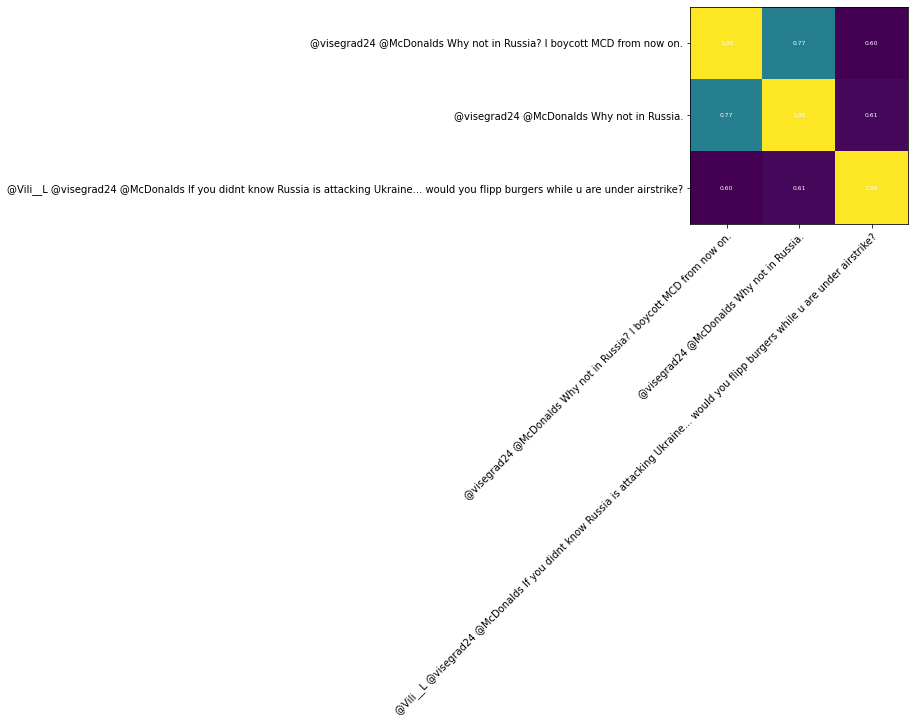

Time 8 143.72796082496643


In [37]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
#import tensorflow
#import tensorflow_hub as hub
import time

t0 = time.time()
module_url = "https://tfhub.dev/google/universal-sentence-encoder/1?tf-hub-format=compressed"
t1 = time.time()
print("Time 1", t1-t0)

# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)
t2 = time.time()
print("Time 2", t2-t0)

# sample text
messages = [
# Smartphones
"My phone is not good.",
"Your cellphone looks great.",

# Weather
"Will it snow tomorrow?",
"Recently a lot of hurricanes have hit the US",

# Food and health
"An apple a day, keeps the doctors away",
"Eating strawberries is healthy",
]


messages = [texts[15], texts[16], texts[10]]

t3 = time.time()
print("Time 3", t3-t0)

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
t4 = time.time()
print("Time 4", t4-t0)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    t5 = time.time()
    print("Time 5", t5-t0)
    # This takes about a minute to set up, way too long in practice, we want to only do it once
    session.run(tf.tables_initializer())
    t6 = time.time()
    print("Time 6", t6-t0)
    message_embeddings_ = session.run(similarity_message_encodings, feed_dict={similarity_input_placeholder: messages})
    t7 = time.time()
    print("Time 7", t7-t0)
    corr = np.inner(message_embeddings_, message_embeddings_)
    print(corr)
    heatmap(messages, messages, corr)
    t8 = time.time()
    print("Time 8", t8-t0)


### Now finally the tweets:

In [27]:
texts = tweets_en_df[0:150]["Text"].to_numpy()

Time 1 9.989738464355469e-05
Time 2 4.277702808380127
Time 3 4.278163909912109
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Time 4 5.754745960235596
Time 5 41.46057486534119
Time 6 180.83430075645447
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48


Messages:
 There are over 850 McDonalds locations in Russia, and Russia is getting sanctioned.  How does McDonalds - an American company - legally opportune in a country under these sanctions?  Sounds like they just lost @McDonaldsCorp https://t.co/A5WwPfh3Gc 

and

 Hey @McDonalds - Have you considered making the menu hacks illegal in Russia until the war ends? Or do you not care about peace? 

similar with score 0.75480896
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69


Messages:
 There are over 850 McDonalds locations in Russia, and Russia is getting sanctioned.  How does McDonalds - an American company - legally opportun

2 130
2 131
2 132
2 133
2 134


Messages:
 @mrvintageestate For the first time, two countries with McDonalds in them have gone to war.

I can't believe that's a legitimate sentence.

#ukraine #russia #ukrainerussiaconflict https://t.co/IEl0cvkPUw 

and

 Unless the #Ukraine @McDonalds has breakfast bagels, I don’t see the point! #Russia #RussiaUkraineCrisis #wednesdaythought 

similar with score 0.8138277
2 135
2 136
2 137
2 138
2 139
2 140
2 141
2 142
2 143
2 144
2 145
2 146
2 147
2 148


Messages:
 @mrvintageestate For the first time, two countries with McDonalds in them have gone to war.

I can't believe that's a legitimate sentence.

#ukraine #russia #ukrainerussiaconflict https://t.co/IEl0cvkPUw 

and

 Pretty sure there are McDonalds in both Russia and Ukraine, AND YET 👀👀👀 https://t.co/z7STPAfx2U 

similar with score 0.7532778
2 149
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12


Messages:
 @Cisco @Apple @Microsoft @MDLZ @PepsiCo @McDonalds @Boeing @fordm @exxonmobil 
Get out of Russia.

7 77
7 78
7 79
7 80


Messages:
 Russia invaded the Ukraine because McDonalds wont bring back the McRib 

and

 @visegrad24 @McDonalds Russia will seize and destroy this garbage, give them real food. 

similar with score 0.8365689
7 81


Messages:
 Russia invaded the Ukraine because McDonalds wont bring back the McRib 

and

 @Ukraine @Russia @Russia is your @McDonalds still open? 

similar with score 0.7632778
7 82
7 83
7 84
7 85


Messages:
 Russia invaded the Ukraine because McDonalds wont bring back the McRib 

and

 @McDonalds Ukraine with a side of Russia 

similar with score 0.75709355
7 86
7 87
7 88


Messages:
 Russia invaded the Ukraine because McDonalds wont bring back the McRib 

and

 @visegrad24 @McDonalds They should suspend all restaurants in #Russia, not in #Ukraine 

similar with score 0.76504856
7 89
7 90


Messages:
 Russia invaded the Ukraine because McDonalds wont bring back the McRib 

and

 @Vili__L @visegrad24 @McDonalds If you didnt know Russia is attacking Uk

12 18
12 19
12 20
12 21
12 22
12 23
12 24
12 25
12 26
12 27
12 28
12 29
12 30
12 31
12 32
12 33
12 34
12 35
12 36
12 37
12 38
12 39
12 40
12 41
12 42
12 43
12 44
12 45
12 46
12 47
12 48
12 49
12 50
12 51
12 52
12 53
12 54
12 55
12 56
12 57
12 58
12 59
12 60
12 61
12 62
12 63
12 64
12 65
12 66
12 67
12 68
12 69
12 70
12 71
12 72
12 73
12 74
12 75
12 76
12 77
12 78
12 79
12 80
12 81
12 82
12 83
12 84
12 85
12 86
12 87
12 88
12 89
12 90
12 91
12 92
12 93
12 94
12 95
12 96
12 97
12 98
12 99
12 100
12 101
12 102
12 103
12 104
12 105
12 106
12 107
12 108
12 109
12 110
12 111
12 112
12 113
12 114
12 115
12 116
12 117
12 118
12 119
12 120
12 121
12 122
12 123
12 124
12 125
12 126


Messages:
 When will @Apple @Microsoft @Google @facebookapp @McDonalds @CocaCola @ToyotaMotorCorp @Disney come out &amp; withdraw goods &amp; services to #Russia in support of #Ukraine

#Apple #Microsoft #Google #Facebook #McDonalds #Toyota  #CocaCola #Disney #IStandWithUkraine🇺🇦@Russia @Ukraine 

and

 I expect all

15 31
15 32
15 33
15 34
15 35
15 36
15 37
15 38
15 39
15 40
15 41
15 42
15 43
15 44


Messages:
 @justinfiorilli @Apple @Boeing @Cisco @CocaCola @jpmorgan @McDonalds @MorganStanley @pepsi @Starbucks @WaltDisneyCo How about they stop doing business in Russia or we stop doing business with them. 

and

 @justinfiorilli @Apple @Boeing @Cisco @CocaCola @jpmorgan @McDonalds @MorganStanley @pepsi @Starbucks @WaltDisneyCo Yes, they all should stop doing business with Russia.🇺🇸🇺🇸🇺🇸 

similar with score 0.92521024
15 45
15 46
15 47
15 48
15 49
15 50
15 51
15 52
15 53
15 54
15 55
15 56
15 57
15 58
15 59
15 60
15 61
15 62
15 63
15 64
15 65
15 66
15 67
15 68
15 69
15 70
15 71
15 72
15 73
15 74
15 75
15 76
15 77
15 78
15 79
15 80
15 81
15 82
15 83
15 84
15 85
15 86
15 87
15 88
15 89
15 90
15 91
15 92
15 93
15 94
15 95
15 96
15 97
15 98
15 99
15 100
15 101
15 102
15 103
15 104
15 105
15 106
15 107
15 108
15 109
15 110
15 111
15 112
15 113
15 114
15 115
15 116
15 117
15 118
15 119
15 120
15 121
15 12

16 113
16 114
16 115


Messages:
 @KunalTomar20 @ruchirsharma_1 No two countries that have McDonalds ever went to war. 

Bit now Russia and Ukraine both have McDonalds. 

and

 McDonalds in lviv is still open.They do best fries.
#Ukraine #Russia 

similar with score 0.7721156
16 116
16 117
16 118
16 119
16 120
16 121


Messages:
 @KunalTomar20 @ruchirsharma_1 No two countries that have McDonalds ever went to war. 

Bit now Russia and Ukraine both have McDonalds. 

and

 Thomas Friedman's theory no longer stands: No two countries that both have a McDonald's have ever fought a war against each other. #Ukraine #UkraineRussiaCrisis #McDonalds #Russia 

similar with score 0.80899936
16 122
16 123
16 124
16 125
16 126
16 127


Messages:
 @KunalTomar20 @ruchirsharma_1 No two countries that have McDonalds ever went to war. 

Bit now Russia and Ukraine both have McDonalds. 

and

 no country that has a mcdonalds has ever attacked another country that has a mcdonalds, the only exception being ru

20 28


Messages:
 @McDonalds LEAVE RUSSIA NOW! #Ukraine 

and

 I just want to know if Russia and Ukraine each have McDonalds 🤔 

similar with score 0.80175054
20 29
20 30
20 31
20 32
20 33
20 34
20 35
20 36
20 37
20 38
20 39
20 40
20 41


Messages:
 @McDonalds LEAVE RUSSIA NOW! #Ukraine 

and

 @McDonalds Ayoo Ukraine being invaded by russia 

similar with score 0.8246162
20 42
20 43
20 44
20 45
20 46
20 47


Messages:
 @McDonalds LEAVE RUSSIA NOW! #Ukraine 

and

 @GarbageApe @McDonalds @McDonalds please stop this. Putin and Russia are being cancelled and we need your help. 

similar with score 0.7824308
20 48
20 49
20 50
20 51
20 52
20 53


Messages:
 @McDonalds LEAVE RUSSIA NOW! #Ukraine 

and

 Calling all US companies in Russia to close immediately.  @PepsiCo @McDonalds @ProcterGamble @generalelectric 

similar with score 0.7531702
20 54
20 55


Messages:
 @McDonalds LEAVE RUSSIA NOW! #Ukraine 

and

 So.  Is @McDonalds open today in Moscow?  #Moscow #Ukraine #UkraineRussia #Ukr

22 127
22 128
22 129
22 130
22 131
22 132
22 133
22 134


Messages:
 Russia is the biggest exporter of wheat, who new? @McDonalds has the largest exposure to Russia, who knew? 

and

 Unless the #Ukraine @McDonalds has breakfast bagels, I don’t see the point! #Russia #RussiaUkraineCrisis #wednesdaythought 

similar with score 0.7572355
22 135
22 136
22 137
22 138
22 139
22 140
22 141


Messages:
 Russia is the biggest exporter of wheat, who new? @McDonalds has the largest exposure to Russia, who knew? 

and

 It’s a start. Still a lot of American companies operating in Russia. Starve the Russian people of their @Starbucks, @dunkindonuts, and @McDonalds and we may have a real revolt against Putin. https://t.co/47BWsCjBb8 

similar with score 0.7946127
22 142
22 143
22 144
22 145
22 146
22 147
22 148


Messages:
 Russia is the biggest exporter of wheat, who new? @McDonalds has the largest exposure to Russia, who knew? 

and

 Pretty sure there are McDonalds in both Russia and Ukraine, AN

28 127
28 128
28 129
28 130
28 131
28 132
28 133
28 134


Messages:
 I just want to know if Russia and Ukraine each have McDonalds 🤔 

and

 Unless the #Ukraine @McDonalds has breakfast bagels, I don’t see the point! #Russia #RussiaUkraineCrisis #wednesdaythought 

similar with score 0.76467836
28 135
28 136
28 137
28 138
28 139
28 140
28 141
28 142
28 143
28 144
28 145
28 146
28 147
28 148


Messages:
 I just want to know if Russia and Ukraine each have McDonalds 🤔 

and

 Pretty sure there are McDonalds in both Russia and Ukraine, AND YET 👀👀👀 https://t.co/z7STPAfx2U 

similar with score 0.8311731
28 149
29 30
29 31


Messages:
 This is the first time that two countries with a @McDonalds have ever gone to war with each other. 

#Ukraine #Russia 

and

 don't both ukraine and russia have mcdonalds. that means this isn't a war 

similar with score 0.786982
29 32
29 33
29 34
29 35
29 36
29 37
29 38
29 39
29 40
29 41
29 42
29 43
29 44
29 45
29 46
29 47
29 48
29 49
29 50
29 51
29 52
29 53


32 104
32 105
32 106
32 107
32 108
32 109
32 110
32 111
32 112
32 113
32 114
32 115
32 116
32 117
32 118
32 119
32 120
32 121
32 122
32 123
32 124
32 125
32 126
32 127
32 128
32 129
32 130
32 131
32 132
32 133
32 134
32 135
32 136
32 137
32 138
32 139
32 140
32 141
32 142
32 143
32 144
32 145
32 146
32 147
32 148
32 149
33 34
33 35
33 36
33 37
33 38
33 39
33 40
33 41
33 42
33 43
33 44
33 45
33 46
33 47
33 48
33 49
33 50
33 51
33 52
33 53
33 54
33 55
33 56
33 57
33 58
33 59
33 60
33 61
33 62
33 63
33 64
33 65
33 66
33 67
33 68
33 69
33 70
33 71
33 72
33 73
33 74
33 75
33 76
33 77
33 78
33 79
33 80
33 81
33 82
33 83
33 84
33 85
33 86
33 87
33 88


Messages:
 @johngansjr Can the sanctions on Russia include closing the McDonalds? 

(one of my favorite pictures of St. Basil's with the line of McDonald's signs leading up to it) https://t.co/6pi8DHvkoJ 

and

 @visegrad24 @McDonalds They should suspend all restaurants in #Russia, not in #Ukraine 

similar with score 0.76826006
33 89
33 90
33 

40 63
40 64
40 65
40 66
40 67
40 68
40 69
40 70
40 71
40 72
40 73
40 74
40 75
40 76
40 77
40 78
40 79
40 80
40 81
40 82
40 83
40 84
40 85
40 86
40 87
40 88
40 89
40 90
40 91
40 92
40 93
40 94
40 95
40 96
40 97
40 98
40 99
40 100
40 101
40 102
40 103
40 104
40 105
40 106
40 107
40 108
40 109
40 110
40 111
40 112
40 113
40 114
40 115
40 116
40 117
40 118
40 119
40 120
40 121
40 122
40 123
40 124
40 125
40 126
40 127
40 128
40 129
40 130
40 131
40 132
40 133
40 134
40 135
40 136
40 137
40 138
40 139
40 140
40 141
40 142
40 143
40 144
40 145
40 146
40 147
40 148
40 149
41 42
41 43
41 44
41 45
41 46
41 47
41 48
41 49
41 50
41 51
41 52
41 53
41 54
41 55


Messages:
 @McDonalds Ayoo Ukraine being invaded by russia 

and

 So.  Is @McDonalds open today in Moscow?  #Moscow #Ukraine #UkraineRussia #UkraineRussiaConflict #Kyiv #Russia #russianinvasion #RussiaInvadesUkraine #Kiev #worldwar3 

similar with score 0.79210407
41 56
41 57
41 58
41 59
41 60
41 61
41 62
41 63
41 64
41 65
41 66
41 67
41 6

47 63
47 64
47 65
47 66
47 67
47 68
47 69
47 70
47 71
47 72
47 73
47 74
47 75
47 76
47 77
47 78
47 79
47 80


Messages:
 @GarbageApe @McDonalds @McDonalds please stop this. Putin and Russia are being cancelled and we need your help. 

and

 @visegrad24 @McDonalds Russia will seize and destroy this garbage, give them real food. 

similar with score 0.81529665
47 81
47 82
47 83
47 84
47 85
47 86
47 87
47 88


Messages:
 @GarbageApe @McDonalds @McDonalds please stop this. Putin and Russia are being cancelled and we need your help. 

and

 @visegrad24 @McDonalds They should suspend all restaurants in #Russia, not in #Ukraine 

similar with score 0.76371324
47 89
47 90


Messages:
 @GarbageApe @McDonalds @McDonalds please stop this. Putin and Russia are being cancelled and we need your help. 

and

 @Vili__L @visegrad24 @McDonalds If you didnt know Russia is attacking Ukraine... would you flipp burgers while u are under airstrike? 

similar with score 0.7626899
47 91
47 92
47 93
47 94
47 95

53 128
53 129
53 130
53 131
53 132
53 133
53 134
53 135
53 136
53 137


Messages:
 Calling all US companies in Russia to close immediately.  @PepsiCo @McDonalds @ProcterGamble @generalelectric 

and

 American companies doing business in Russia need to pull out now. Ford, Boeing, Coca Cola, Pepsi, McDonalds… 

similar with score 0.7724535
53 138
53 139
53 140
53 141
53 142
53 143
53 144
53 145
53 146
53 147
53 148
53 149
54 55
54 56
54 57
54 58
54 59
54 60
54 61
54 62
54 63
54 64
54 65
54 66
54 67
54 68
54 69
54 70
54 71
54 72
54 73
54 74
54 75
54 76
54 77
54 78
54 79
54 80
54 81
54 82
54 83
54 84
54 85
54 86
54 87
54 88
54 89
54 90
54 91
54 92
54 93
54 94
54 95
54 96
54 97
54 98
54 99
54 100
54 101
54 102
54 103
54 104
54 105
54 106
54 107
54 108
54 109
54 110
54 111
54 112
54 113
54 114
54 115
54 116
54 117
54 118
54 119
54 120
54 121
54 122
54 123
54 124
54 125
54 126
54 127
54 128
54 129
54 130
54 131
54 132
54 133
54 134
54 135
54 136
54 137
54 138
54 139
54 140
54 141
54 142
54 1

62 112
62 113
62 114
62 115


Messages:
 @visegrad24 @McDonalds They must suspend their service in Russia 

and

 McDonalds in lviv is still open.They do best fries.
#Ukraine #Russia 

similar with score 0.7921093
62 116


Messages:
 @visegrad24 @McDonalds They must suspend their service in Russia 

and

 @airbud691 @PetrichorIntel @AuroraIntel What they gona sanction, mcdonalds in russia? 

similar with score 0.8277913
62 117
62 118
62 119
62 120
62 121
62 122
62 123
62 124
62 125
62 126
62 127
62 128
62 129
62 130
62 131
62 132
62 133
62 134
62 135
62 136
62 137
62 138
62 139
62 140
62 141
62 142
62 143
62 144
62 145
62 146
62 147
62 148
62 149
63 64
63 65
63 66
63 67
63 68
63 69
63 70
63 71
63 72
63 73
63 74
63 75
63 76
63 77
63 78
63 79
63 80
63 81
63 82
63 83
63 84
63 85


Messages:
 @Oneill28_ @drunkRomanian @Russia it’s a MCDONALDS SPRITE 

and

 @McDonalds Ukraine with a side of Russia 

similar with score 0.75724757
63 86
63 87
63 88
63 89
63 90
63 91
63 92
63 93
63 94
63 95
6

70 103
70 104
70 105
70 106
70 107
70 108
70 109
70 110
70 111
70 112
70 113
70 114
70 115
70 116
70 117
70 118
70 119
70 120
70 121
70 122
70 123
70 124
70 125
70 126
70 127
70 128
70 129
70 130
70 131
70 132
70 133
70 134
70 135
70 136
70 137
70 138
70 139
70 140
70 141
70 142
70 143
70 144
70 145
70 146
70 147
70 148
70 149
71 72


Messages:
 @McDonalds Close your restaurants in Russia. 

and

 @McDonalds Shut down your franchises in Russia!!! 

similar with score 0.83717835
71 73
71 74
71 75


Messages:
 @McDonalds Close your restaurants in Russia. 

and

 @visegrad24 @McDonalds They should close restaurants in Russia. But, I'm not sure that's the punishment. 🙃 

similar with score 0.78234476
71 76
71 77
71 78
71 79
71 80
71 81
71 82
71 83
71 84
71 85


Messages:
 @McDonalds Close your restaurants in Russia. 

and

 @McDonalds Ukraine with a side of Russia 

similar with score 0.7569285
71 86
71 87


Messages:
 @McDonalds Close your restaurants in Russia. 

and

 @jorba100 @Silence



Messages:
 @visegrad24 @McDonalds They should close restaurants in Russia. But, I'm not sure that's the punishment. 🙃 

and

 @visegrad24 @McDonalds They should suspend all restaurants in #Russia, not in #Ukraine 

similar with score 0.8518336
75 89
75 90
75 91
75 92


Messages:
 @visegrad24 @McDonalds They should close restaurants in Russia. But, I'm not sure that's the punishment. 🙃 

and

 @visegrad24 @McDonalds What ? They have to do this in Russia ! 

similar with score 0.7723875
75 93


Messages:
 @visegrad24 @McDonalds They should close restaurants in Russia. But, I'm not sure that's the punishment. 🙃 

and

 @visegrad24 @McDonalds Suspend them in Russia too @McDonalds 

similar with score 0.78913045
75 94
75 95
75 96
75 97
75 98


Messages:
 @visegrad24 @McDonalds They should close restaurants in Russia. But, I'm not sure that's the punishment. 🙃 

and

 @visegrad24 @McDonalds But not in Russia? 

similar with score 0.7638354
75 99
75 100


Messages:
 @visegrad24 @McDonalds T

81 99


Messages:
 @Ukraine @Russia @Russia is your @McDonalds still open? 

and

 what about #russia, #McDonalds? https://t.co/GCDnvX3Uij 

similar with score 0.76080996
81 100
81 101
81 102
81 103
81 104
81 105


Messages:
 @Ukraine @Russia @Russia is your @McDonalds still open? 

and

 @KevinRothrock @joshtpm Now do Russia @McDonalds 

similar with score 0.7879205
81 106
81 107


Messages:
 @Ukraine @Russia @Russia is your @McDonalds still open? 

and

 @McDonalds Educated guess: The order to attack a foreign country maybe? 
Why don't you shut down all restaurants in Russia, immediately?!
(And why, instead, you shut down all activity in Ukraine?) 

similar with score 0.77442926
81 108


Messages:
 @Ukraine @Russia @Russia is your @McDonalds still open? 

and

 @KevinRothrock Time to for McDonalds and all western companies to shut out Moscow and the rest of Russia. 

similar with score 0.7936751
81 109
81 110
81 111


Messages:
 @Ukraine @Russia @Russia is your @McDonalds still open?

87 91
87 92


Messages:
 @jorba100 @SilenceeXD_ Close the McDonalds in Russia 

and

 @visegrad24 @McDonalds What ? They have to do this in Russia ! 

similar with score 0.8522435
87 93


Messages:
 @jorba100 @SilenceeXD_ Close the McDonalds in Russia 

and

 @visegrad24 @McDonalds Suspend them in Russia too @McDonalds 

similar with score 0.7818131
87 94
87 95
87 96


Messages:
 @jorba100 @SilenceeXD_ Close the McDonalds in Russia 

and

 @visegrad24 @McDonalds Why not in Russia. 

similar with score 0.8197468
87 97
87 98


Messages:
 @jorba100 @SilenceeXD_ Close the McDonalds in Russia 

and

 @visegrad24 @McDonalds But not in Russia? 

similar with score 0.87559366
87 99
87 100


Messages:
 @jorba100 @SilenceeXD_ Close the McDonalds in Russia 

and

 @McDonalds STOP ALL RESTAURANTS IN RUSSIA! 

similar with score 0.8411915
87 101
87 102
87 103
87 104
87 105
87 106
87 107
87 108
87 109
87 110
87 111
87 112
87 113
87 114
87 115


Messages:
 @jorba100 @SilenceeXD_ Close the McDonalds i

90 139
90 140
90 141
90 142
90 143
90 144
90 145
90 146
90 147
90 148
90 149
91 92
91 93
91 94
91 95


Messages:
 @visegrad24 @McDonalds Well, of course, no demand for mc donald so they have to wrap the business and open more restaurants in Russia🤮Are these sanctions against Russia? 

and

 @visegrad24 @McDonalds Why not in Russia? I boycott MCD from now on. 

similar with score 0.7510705
91 96
91 97
91 98
91 99
91 100
91 101
91 102
91 103
91 104
91 105
91 106
91 107
91 108
91 109
91 110
91 111
91 112
91 113
91 114
91 115
91 116
91 117
91 118
91 119
91 120
91 121
91 122
91 123
91 124
91 125
91 126
91 127
91 128
91 129
91 130
91 131
91 132
91 133
91 134
91 135
91 136
91 137
91 138
91 139
91 140
91 141
91 142
91 143
91 144
91 145
91 146
91 147
91 148
91 149
92 93


Messages:
 @visegrad24 @McDonalds What ? They have to do this in Russia ! 

and

 @visegrad24 @McDonalds Suspend them in Russia too @McDonalds 

similar with score 0.8478196
92 94


Messages:
 @visegrad24 @McDonalds What ? The

97 134
97 135
97 136
97 137
97 138
97 139
97 140
97 141
97 142
97 143
97 144
97 145
97 146
97 147
97 148


Messages:
 @visegrad24 @McDonalds They are punishing Ukraine? Not Russia? 

and

 Pretty sure there are McDonalds in both Russia and Ukraine, AND YET 👀👀👀 https://t.co/z7STPAfx2U 

similar with score 0.78430647
97 149
98 99


Messages:
 @visegrad24 @McDonalds But not in Russia? 

and

 what about #russia, #McDonalds? https://t.co/GCDnvX3Uij 

similar with score 0.76766515
98 100


Messages:
 @visegrad24 @McDonalds But not in Russia? 

and

 @McDonalds STOP ALL RESTAURANTS IN RUSSIA! 

similar with score 0.88347113
98 101
98 102
98 103
98 104
98 105


Messages:
 @visegrad24 @McDonalds But not in Russia? 

and

 @KevinRothrock @joshtpm Now do Russia @McDonalds 

similar with score 0.83076346
98 106
98 107
98 108
98 109
98 110
98 111
98 112
98 113
98 114
98 115


Messages:
 @visegrad24 @McDonalds But not in Russia? 

and

 McDonalds in lviv is still open.They do best fries.
#Ukraine #

107 111


Messages:
 @McDonalds Educated guess: The order to attack a foreign country maybe? 
Why don't you shut down all restaurants in Russia, immediately?!
(And why, instead, you shut down all activity in Ukraine?) 

and

 @McDonalds What about McDonald's in Russia? I know it isn't nice to cut money from that big country but I think this would show Russia that even companies don't support russian attack 

similar with score 0.7860187
107 112
107 113
107 114
107 115
107 116
107 117
107 118
107 119
107 120
107 121
107 122
107 123
107 124
107 125
107 126
107 127


Messages:
 @McDonalds Educated guess: The order to attack a foreign country maybe? 
Why don't you shut down all restaurants in Russia, immediately?!
(And why, instead, you shut down all activity in Ukraine?) 

and

 no country that has a mcdonalds has ever attacked another country that has a mcdonalds, the only exception being russia attacking ukraine 

similar with score 0.7670274
107 128
107 129
107 130
107 131
107 132
107 

116 140
116 141
116 142
116 143
116 144
116 145
116 146
116 147
116 148
116 149
117 118
117 119
117 120
117 121
117 122
117 123
117 124
117 125
117 126
117 127
117 128
117 129
117 130
117 131
117 132
117 133
117 134
117 135
117 136
117 137
117 138
117 139
117 140
117 141
117 142
117 143
117 144
117 145
117 146
117 147
117 148
117 149
118 119
118 120
118 121
118 122
118 123
118 124
118 125
118 126
118 127
118 128
118 129
118 130
118 131
118 132
118 133
118 134
118 135
118 136
118 137
118 138
118 139
118 140
118 141
118 142
118 143
118 144
118 145
118 146
118 147
118 148
118 149
119 120
119 121
119 122
119 123
119 124
119 125
119 126
119 127
119 128
119 129
119 130
119 131
119 132
119 133
119 134
119 135
119 136
119 137
119 138
119 139
119 140
119 141
119 142
119 143
119 144
119 145
119 146
119 147
119 148
119 149
120 121
120 122
120 123
120 124
120 125
120 126
120 127
120 128
120 129
120 130
120 131
120 132
120 133
120 134
120 135
120 136
120 137
120 138
120 139
120 140
120 141
120 142


/Users/ms731/opt/anaconda3/envs/tensorflow-py3.7.9/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
/Users/ms731/opt/anaconda3/envs/tensorflow-py3.7.9/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
/Users/ms731/opt/anaconda3/envs/tensorflow-py3.7.9/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


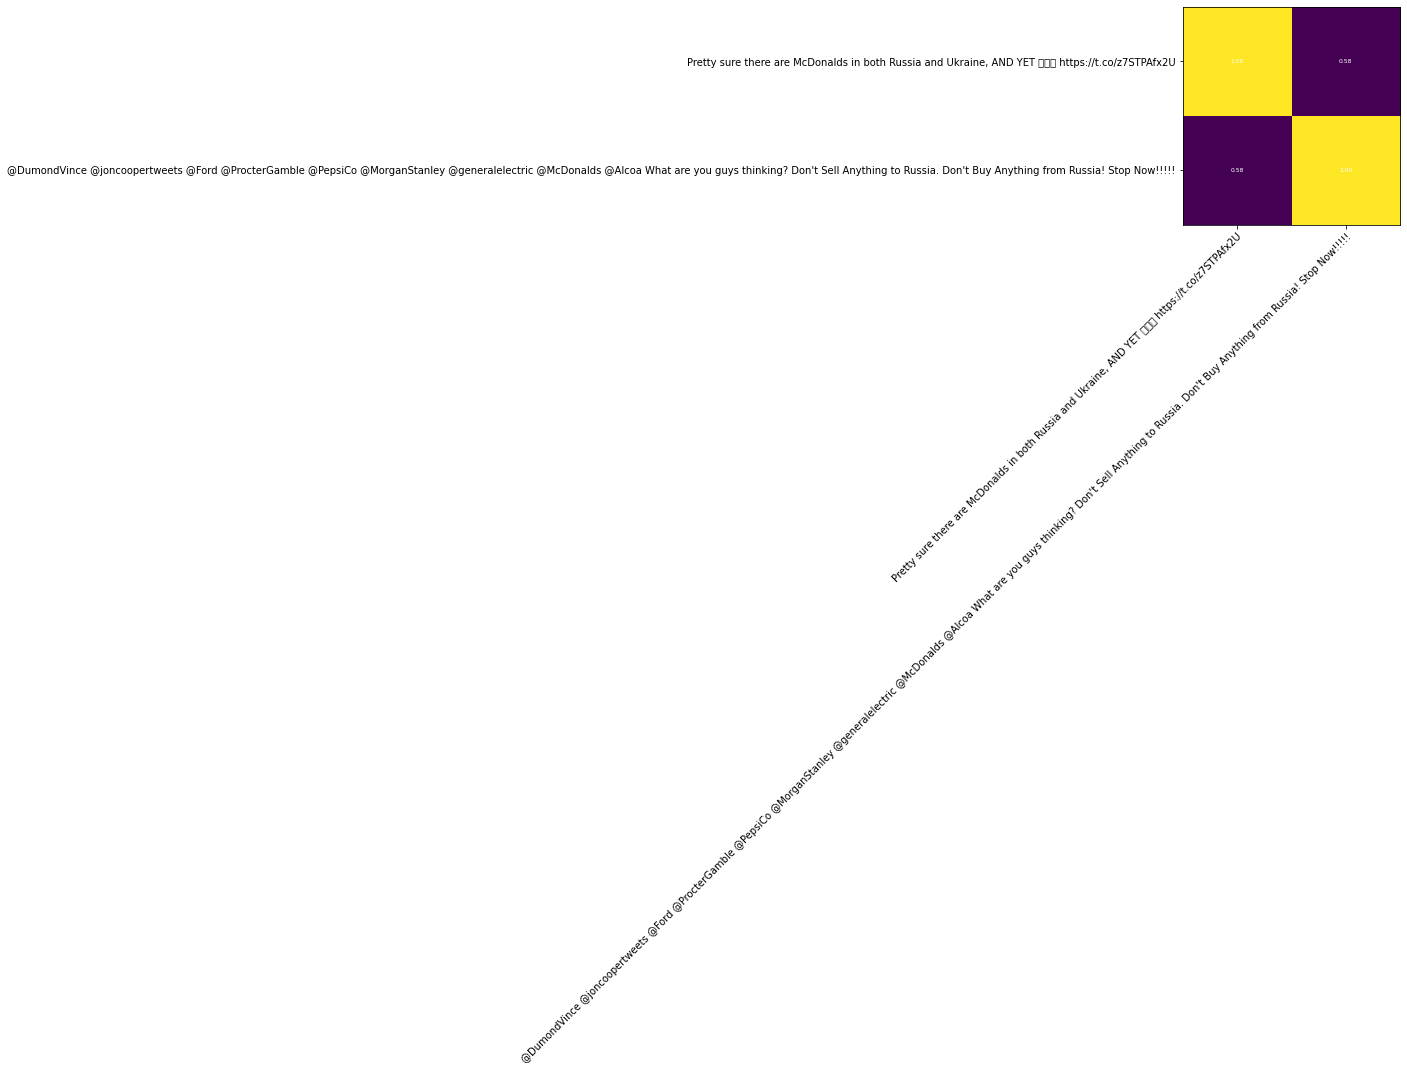

Time 8 220.793212890625


In [28]:
## Let's try to actually make tensorflow work dynamically...weird right??
import time

t0 = time.time()
module_url = "https://tfhub.dev/google/universal-sentence-encoder/1?tf-hub-format=compressed"
t1 = time.time()
print("Time 1", t1-t0)

# Import the Universal Sentence Encoder's TF Hub module
embed = hub.Module(module_url)
t2 = time.time()
print("Time 2", t2-t0)

t3 = time.time()
print("Time 3", t3-t0)

similarity_input_placeholder = tf.placeholder(tf.string, shape=(None))
similarity_message_encodings = embed(similarity_input_placeholder)
t4 = time.time()
print("Time 4", t4-t0)

with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    t5 = time.time()
    print("Time 5", t5-t0)
    # This takes about a minute to set up, way too long in practice, we want to only do it once
    session.run(tf.tables_initializer())
    t6 = time.time()
    print("Time 6", t6-t0)
    
    
    # Here is the magic 
    for i, message0 in enumerate(texts):
        for j, message1 in enumerate(texts):
            if j > i:
                t65 = time.time()
                print(i,j)
                messages = [message0, message1]
                #print("Time 6.5", t65-t0)
                message_embeddings_ = session.run(similarity_message_encodings, feed_dict={similarity_input_placeholder: messages})
                t7 = time.time()
                #print("Time 7", t7-t0)
                
                corr = np.inner(message_embeddings_, message_embeddings_)
                
                if corr[0,1] > 0.75:
                    print("\n\nMessages:\n", message0, "\n\nand\n\n", message1, "\n\nsimilar with score", corr[0,1])
                
    heatmap(messages, messages, corr)
    t8 = time.time()
    print("Time 8", t8-t0)

Okay, so even this is better.... What we can also is look for tweets  with the same hashtag and the same message. Well it's okay actually if it finds regular tweets, botometer will still sort them out

In [ ]:
tweets_en